In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import missingno as msno

% matplotlib inline


In [2]:
# df = pd.read_csv(
#     "E:\Workspace\jupyter_notebook\\notebook_idata_lesson01\\test\data\\test_data.csv"
# )

#mac下读取
df = pd.read_csv(
    "/Users/li/workspace/jupyter_notebook/notebook_idata_lesson01/test/data/test_data.csv"
)
print(df.shape)
df[:5]


(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
# info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [4]:
# describe
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [5]:
# 查看所有的列名
df.columns.get_values().tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y']

特征的含义

|column_name|含义|
|---|---|
|age|年龄|
|job|职业|
|marital|婚姻状况|
|education|教育程度|
|default|是否有违约记录|
|housing|是否有房贷记录|
|loan|是否有个人贷款|
|contact|联络方式|
|month|最近一次联系的月份|
|day_of_week|最近一次联系的日期|
|duration|通话持续时间|
|campaign|联系的次数|
|pdays|离上一次电话营销的天数|
|previous|在此次电话营销钱与该客户的联系次数|
|poutcome|上一次对该客户的营销结果|
|emp_var_rate|就业情况|
|cons_price_idx|消费者价格指数|
|cons_conf_idx|消费者信心指数|
|euribor3m|欧洲银行间欧元同业拆借利率|
|nr_employed|就业人数|
|y|是否会在该银行注册一份定期存款，1会，0不会|



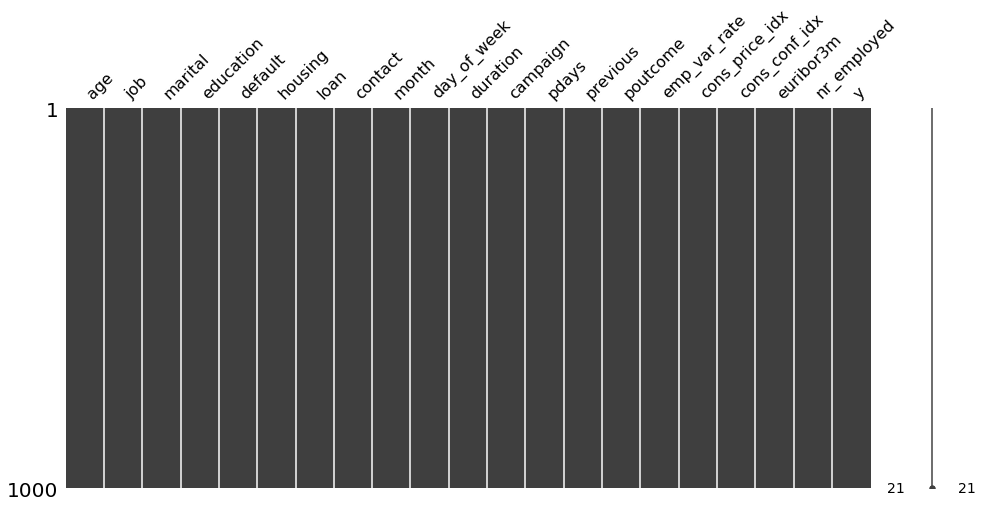

In [6]:
# 查看空值情况
msno.matrix(df.sample(1000), figsize=(16, 7), width_ratios=(15, 1))

In [7]:
# pandas_profiling
pandas_profiling.ProfileReport(df)

Number of variables,21
Number of observations,41188
Total Missing (%),0.0%
Total size in memory,6.6 MiB
Average record size in memory,168.0 B
Numeric,8
Categorical,10
Boolean,1
Date,0
Text (Unique),0
Rejected,2


In [8]:
# job列
df["job"].value_counts()

#
job_replace = {
    "job": {
        "admin": 1,
        "blue-collar": 2,
        "technician": 3,
        "services": 4,
        "management": 5,
        "retired": 6,
        "entrepreneur": 7,
        "self-employed": 8,
        "housemaid": 9,
        "unemployed": 10,
        "student": 11,
        "unknown": 12
    }
}

df = df.replace(job_replace)

df[:5]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,2,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,3,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,5,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,4,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,6,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [9]:
# 婚姻状况
df["marital"].value_counts()

# 替换值
marital_replace = {
    "marital": {
        "married": 1,
        "single": 2,
        "divorced": 3,
        "unknown": 4
    }
}

df = df.replace(marital_replace)
df[:5]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,2,1,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,3,1,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,5,2,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,4,1,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,6,1,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [10]:
# 教育程度
df["education"].value_counts()

# 替换值
education_replace = {
    "education": {
        "university.degree": 1,
        "high.school": 2,
        "basic.9y": 3,
        "professional.course": 4,
        "basic.4y": 5,
        "basic.6y": 6,
        "unknown": 7,
        "illiterate": 8
    }
}

df = df.replace(education_replace)
df[:5]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,2,1,5,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,3,1,7,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,5,2,1,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,4,1,2,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,6,1,5,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [11]:
# 是否有违约记录
df["default"].value_counts()

# 替换值
default_replace = {"default": {"no": 1, "unknown": 2, "yes": 3}}

df = df.replace(default_replace)
df[:5]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,2,1,5,2,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,3,1,7,1,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,5,2,1,1,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,4,1,2,1,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,6,1,5,1,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [12]:
# 是有用房贷记录
df["housing"].value_counts()

# 替换值
housing_replace = {"housing": {"yes": 1, "no": 2, "unknown": 3}}

df = df.replace(housing_replace)
df[:5]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,2,1,5,2,1,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,3,1,7,1,2,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,5,2,1,1,1,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,4,1,2,1,2,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,6,1,5,1,1,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [14]:
# 是否有个人贷款
df["loan"].value_counts()

# 替换值
load_replace = {"loan": {"no": 1, "yes": 2, "unknown": 3}}

df = df.replace(load_replace)
df[:5]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,2,1,5,2,1,1,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,3,1,7,1,2,1,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,5,2,1,1,1,1,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,4,1,2,1,2,1,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,6,1,5,1,1,1,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [15]:
# 联络方式
df["contact"].value_counts()

# 感觉这个值对最后的结果应该没很大的影响，先忽略

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [18]:
# 上一次对该客户的营销结果
df["poutcome"].value_counts()

# 替换值
poutcome_replace = {"poutcome": {"nonexistent": 1, "failure": 2, "success": 3}}

df = df.replace(poutcome_replace)
df[:5]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,2,1,5,2,1,1,cellular,aug,thu,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,3,1,7,1,2,1,cellular,nov,fri,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,5,2,1,1,1,1,cellular,jun,thu,...,3,6,2,3,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,4,1,2,1,2,1,cellular,apr,fri,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,6,1,5,1,1,1,cellular,aug,fri,...,1,3,1,3,-2.9,92.201,-31.4,0.869,5076.2,1


In [20]:
# 输出csv
df.to_csv("/Users/li/workspace/jupyter_notebook/notebook_idata_lesson01/test/data/test_data1.csv")

In [21]:
# 读取test_data1.csv
df1 = pd.read_csv(
    "/Users/li/workspace/jupyter_notebook/notebook_idata_lesson01/test/data/test_data1.csv"
)
df1[:5]

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,44,2,1,5,2,1,1,cellular,aug,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,1,53,3,1,7,1,2,1,cellular,nov,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,2,28,5,2,1,1,1,1,cellular,jun,...,3,6,2,3,-1.7,94.055,-39.8,0.729,4991.6,1
3,3,39,4,1,2,1,2,1,cellular,apr,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,4,55,6,1,5,1,1,1,cellular,aug,...,1,3,1,3,-2.9,92.201,-31.4,0.869,5076.2,1
